<a href="https://colab.research.google.com/github/moraes-ederson/Curso_DominandoDS_Flai/blob/main/3_ML_Regressao_Custos_Seguro_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados de uma empresa de Seguros

Identificar qual tipo de cliente representa um maior custo para seguradora.

Observação: Já considerada a EDA básica da aula com o pacote "sweetviz".

In [ ]:
import pandas as pd
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [ ]:
dados.shape

(1338, 7)

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


bmi significa "índice de massa corporal"

charges significa "custos do seguro"

Observado que a pessoa fumante representa um custo muito alto pela baixa idade.
Idade e Fumante mostra ter um peso importante nos custos.

In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Pré-processamento dos dados antes de prosseguir.

*   Transformar a variável "smoker" de categórica (sim, não) para numérica binária (0 = não, 1 = sim).
*   Alterar a escala dos dados analisando os custos a cada 1000 dólares.



In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
dados['charges'] = dados['charges']/1000
dados['charges']

0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
1333    10.600548
1334     2.205981
1335     1.629833
1336     2.007945
1337    29.141360
Name: charges, Length: 1338, dtype: float64

## Deixando o dataset apenas com as variáveis desejadas

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]

In [ ]:
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


## Gráficos pertinentes

In [ ]:
import seaborn as sns

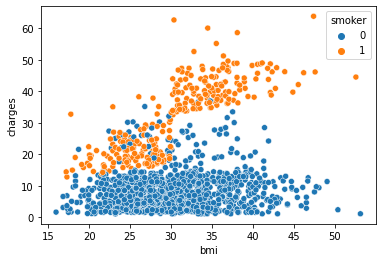

In [ ]:
# criando um gráfico de dispersão para analisar relação entre "bmi", "fumantes" e "custos"

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

É observado que as pessoas fumantes (laranja) representam os maiores custos.

# **Preparando para criar modelo de Machine Learning**

## Separando a Variável Alvo "y" (Target, Label, Dependente) das Covariáveis "X" (Variáveis Independentes)

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y

0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
1333    10.600548
1334     2.205981
1335     1.629833
1336     2.007945
1337    29.141360
Name: charges, Length: 1338, dtype: float64

In [ ]:
reg.predict(X)

array([30.96051084,  9.64417933,  9.34540759, ..., 10.83926629,
        6.55169782, 31.41448868])

## Método de Validação Holdout

In [ ]:
# holdout
# separando em dados de teste e treinamento

from sklearn.model_selection import train_test_split

In [ ]:
# dados de teste representando 25% dos dados.

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

In [ ]:
Xtreino.shape

(1003, 2)

In [ ]:
Xteste.shape

(335, 2)

In [ ]:
# Ajuste do modelo de regressão linear com os dados de treino
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yteste

1169     6.112353
1161     5.124189
329      9.144565
1130     8.582302
1076     8.551347
          ...    
298     38.746355
22       1.137011
399      1.631668
727     16.657717
1294    11.931125
Name: charges, Length: 335, dtype: float64

In [ ]:
# Predição utilizando a amostra teste comparando com a variável resposta yteste
preditos = reg.predict(Xteste)
preditos

array([ 9.59502945, 12.48382367, 10.52916291,  5.91069191,  8.83728343,
        5.90169255,  6.96541677,  9.80021484,  9.59322958, 10.48416612,
       33.52517129,  7.88515126,  4.60218512, 28.42433464, 28.44233336,
        7.748361  , 12.58101675, 31.88008847,  8.2973219 , 34.18392436,
        8.04533985,  7.72136292,  9.16126035, 29.77603836, 11.41469983,
        6.72243408, 10.00540022, 10.7019506 , 11.29590829, 31.31492873,
        5.66950909,  8.47730907,  6.06548088,  8.56910254,  6.31746293,
       31.84409104,  5.59751422, 10.67315265, 33.39198077, 11.13391983,
        9.03886907, 12.19404431, 11.01872804, 30.56258233,  6.31746293,
        9.25305381, 10.74154778,  5.83329742,  7.97334497, 32.88801667,
        8.51330651,  5.02155525, 33.16159718,  4.98555781,  8.15333215,
       30.58418079,  9.8344124 ,  4.80557063,  5.45712422,  6.58564383,
       10.6893515 ,  9.63282676,  5.04675345,  7.4549819 ,  8.52410574,
       10.07379535, 10.86033932,  9.4582392 , 30.76776771,  7.64

## Erro Quadrático Médio

In [ ]:
# Calculando através do numpy
import numpy as np
np.mean((yteste - preditos)**2)

57.29841213412966

In [ ]:
# Calculando através do Scikit Learn
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(yteste, preditos)
print('EQM: {}'.format(round(eqm, 2)))

EQM: 57.3


Nesse cenário, o modelo de regressão linear é dado por

*   Se fumante = sim

**CUSTOS = b0 + b1 *IMC + b2* fumante**

*   Se fumante = não

**CUSTOS = b0 + b1 * IMC**







In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -2.681895997765265
Coeficientes: 
 [ 0.35997436 23.25878966]


## Reta Ajustada

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

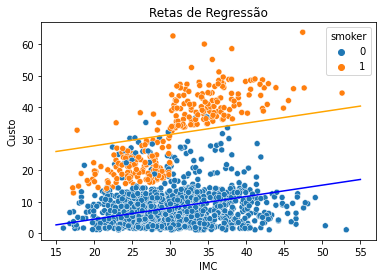

In [ ]:
import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

## **Exercício**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [ ]:
R = 100
eqms = []
for i in range(R):
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
  reg = LinearRegression()
  reg.fit(Xtreino, ytreino)
  preditos = reg.predict(Xteste)
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)

In [ ]:
eqms

[48.34425839669198,
 56.73307736013895,
 43.89000353013334,
 46.74109830984443,
 43.36181360829529,
 54.30251915501613,
 46.62966981701602,
 42.29849989422323,
 54.13534947993473,
 44.904126218355835,
 50.76593630551254,
 54.00025064441547,
 40.57349089427748,
 56.35272485044788,
 48.779666821567936,
 57.395726260497554,
 50.74842304358877,
 51.018542741634306,
 48.55600782404934,
 50.63122030839449,
 49.54155013501399,
 56.41807467219011,
 51.18036356166827,
 50.098075264055886,
 57.4944908130225,
 52.192411753550836,
 52.540420644898504,
 52.030207416506826,
 51.245133370158236,
 60.08770858902911,
 44.833301112418575,
 48.67995615295334,
 53.125862924374054,
 48.35327232972634,
 45.42393451267803,
 50.54525620150727,
 51.35019090603316,
 41.00340640207812,
 41.51983654973257,
 53.842257441096045,
 51.74876902478948,
 50.51767587370594,
 58.828448310039555,
 49.50733166913773,
 53.63137508177366,
 49.660816841867906,
 50.84965485593404,
 52.56711924936074,
 51.778139583607725,
 49.96

In [ ]:
np.mean(eqms)

50.57761423792645

In [ ]:
# criando uma função a partir do comando acima

def HouldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  eqms_treino = []
  eqms_teste = []

  for i in range(replicas):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    
    # treinando o modelo
    reg = modelo
    reg.fit(Xtreino, ytreino)
    
    # verificando o eqm teste
    preditos_treino = reg.predict(Xtreino)
    eqm_treino = mean_squared_error(ytreino, preditos_treino)
    eqms_treino.append(eqm_treino)

    preditos_teste = reg.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos_teste)
    eqms_teste.append(eqm_teste)

  res_treino = np.array(eqms_treino).mean().round(2)
  res_teste = np.array(eqms_teste).mean().round(2)

  print('Média de EQM de TREINO: {}'.format(res_treino))
  print('Média de EQM de TESTE: {}'.format(res_teste))

  return res_treino, res_teste

In [ ]:
HouldoutRep(replicas = 1000)

Média de EQM de TREINO: 50.05
Média de EQM de TESTE: 50.54


(50.05, 50.54)

# **Outros modelos de regressão**

## **K-Vizinhos Mais Próximos (K-Nearest Neighbors)**

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 11)

knnreg.fit(Xtreino, ytreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [ ]:
from sklearn.metrics import mean_squared_error

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrático Médio de TREINO foi: {}'.format(round(eqm_treino, 2)))
print('O Erro Quadrático Médio de TESTE foi: {}'.format(round(eqm_teste, 2)))

O Erro Quadrático Médio de TREINO foi: 39.01
O Erro Quadrático Médio de TESTE foi: 48.58


In [ ]:
HouldoutRep(modelo = KNeighborsRegressor(n_neighbors = 500), replicas = 100)

Média de EQM de TREINO: 140.16
Média de EQM de TESTE: 139.4


(140.16, 139.4)

## **Exercício**

Encontre uma maneira de descobrir qual é o melhor quantidade de vizinhos para se utilizar no KNN. Verifique para os casos quando se usa apenas a variável bmi como preditora e quando se usa as variáveis bmi e smoker.

In [ ]:
K = 100
eqms_knn = []
maior_eqm = 0
menor_eqm = 0
contador_maior = 0
contador_menor = 0
for i in range(K):
   
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

  from sklearn.neighbors import KNeighborsRegressor
  knnreg = KNeighborsRegressor(n_neighbors = K)
  knnreg.fit(Xtreino, ytreino)
  preditos_knn = knnreg.predict(Xteste)
  eqm_knn = mean_squared_error(yteste, preditos_knn)
  eqms_knn.append(eqm_knn)

  if i == 1:
    maior_eqm = eqm_knn
    menor_eqm = eqm_knn
  else:
    if eqm_knn > maior_eqm:
      maior_eqm = eqm_knn
      contador_maior = i
    if eqm_knn < menor_eqm:
      menor_eqm = eqm_knn
      contador_menor = i
print(f'O menor EQM foi de {menor_eqm:.2f} com K = {contador_menor}.') 
print(f'O maior EQM foi de {maior_eqm:.2f} com K = {contador_maior}.')
print(f'\nPortanto {contador_menor} é a melhor quantidade de vizinhos.')

O menor EQM foi de 85.63 com K = 73.
O maior EQM foi de 149.34 com K = 69.

Portanto 73 é a melhor quantidade de vizinhos.


## **Árvore de Regressão**

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

In [ ]:
# Trainando o modelo
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor()
arvore.fit(Xtreino, ytreino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

In [ ]:
eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print(f'O Erro Quadrático Médio no TREINO foi: {eqm_treino:.2f}')
print(f'O Erro Quadrático Médio no TESTE foi: {eqm_teste:.2f}')

O Erro Quadrático Médio no TREINO foi: 77.10
O Erro Quadrático Médio no TESTE foi: 213.67


In [ ]:
HouldoutRep(modelo = DecisionTreeRegressor(max_depth = 2), replicas = 100)

Média de EQM de TREINO: 138.24
Média de EQM de TESTE: 143.72


(138.24, 143.72)

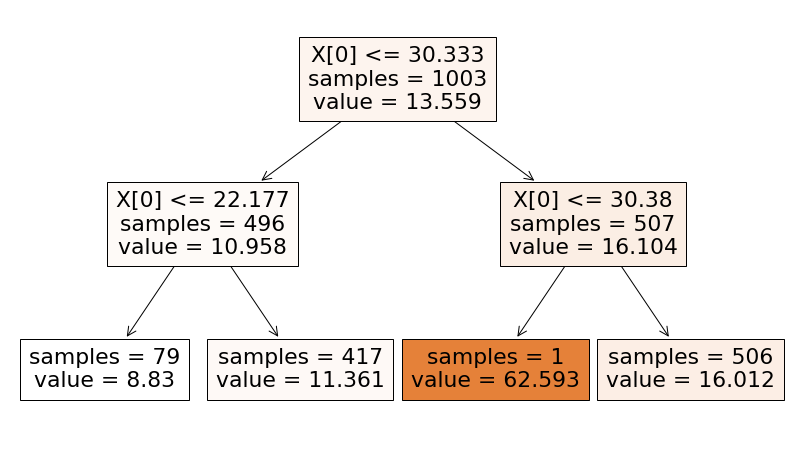

In [ ]:
from sklearn.tree import plot_tree

arvore = DecisionTreeRegressor(max_depth = 2, min_samples_split = 200)
arvore.fit(Xtreino, ytreino)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled = True, proportion = False, impurity = False)
plt.show()

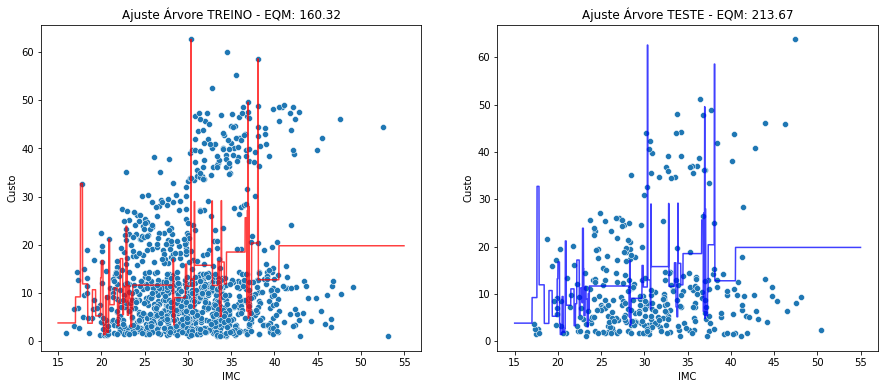

In [ ]:
# gráfico de ajuste

profundidade = 7
arvore = DecisionTreeRegressor(max_depth = profundidade, min_samples_split = 5)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_treino = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
y0 = arvore.predict(x.reshape(-1, 1))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

In [ ]:
profundidade = 5
modelo = DecisionTreeRegressor(max_depth = profundidade)
modelo.fit(Xtreino, ytreino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

In [ ]:
eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

### **Gráficos**

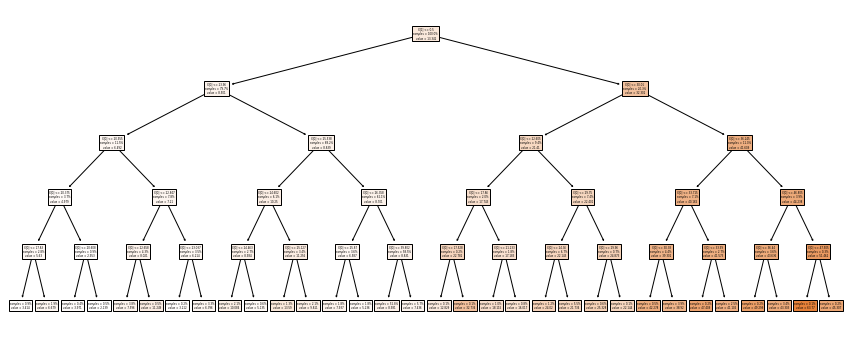

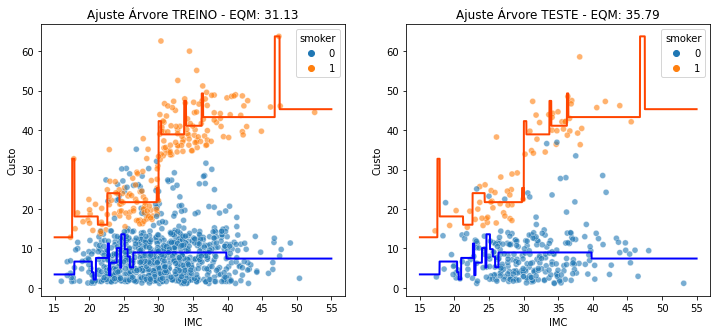

In [ ]:
# árvore de ressão
plt.figure(figsize = (15, 6))
plot_tree(modelo, filled = True, proportion = True, impurity = False)
plt.show()

# gráfico de dispersão com o comportamento da árvore
import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue = Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue = Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

## **Exercício**

Repita o exercício anterior agora no contexto de árvores. Procure pelo melhor valor da profundidade nos dois casos considerados.

In [ ]:
profundidade = 20
eqms_arvore = []

for i in range(profundidade):

  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
  from sklearn.tree import DecisionTreeRegressor
  arvore = DecisionTreeRegressor(max_depth = profundidade)
  arvore.fit(Xtreino, ytreino)

  preditos_arvore = arvore.predict(Xteste)
  eqm_arvore = mean_squared_error(yteste, preditos_arvore)
  eqms_arvore.append(eqm_arvore)

print(f'O menor EQM foi de {min(eqms_arvore):.2f} com profundidade {eqms_arvore.index(min(eqms_arvore))+1}.') 
print(f'O maior EQM foi de {max(eqms_arvore):.2f} com profundidade {eqms_arvore.index(max(eqms_arvore))+1}.')

print(f'\nPortanto {eqms_arvore.index(min(eqms_arvore))+1} foi a melhor profundidade para esta árvore de regressão.')

O menor EQM foi de 47.64 com profundidade 1.
O maior EQM foi de 65.24 com profundidade 2.

Portanto 1 foi a melhor profundidade para esta árvore de regressão.


In [ ]:
np.array(eqms_arvore)

array([47.64096764, 65.24268951, 60.83617444, 62.55926325, 56.29951727,
       58.05174833, 58.89790271, 58.19299684, 59.70029693, 58.86501924,
       60.49011956, 57.97333583, 59.32748839, 60.29894431, 54.89623368,
       62.67864904, 54.41993161, 49.87582347, 53.30823105, 59.23953207])

In [ ]:
np.sort(eqms_arvore)

array([47.64096764, 49.87582347, 53.30823105, 54.41993161, 54.89623368,
       56.29951727, 57.97333583, 58.05174833, 58.19299684, 58.86501924,
       58.89790271, 59.23953207, 59.32748839, 59.70029693, 60.29894431,
       60.49011956, 60.83617444, 62.55926325, 62.67864904, 65.24268951])